<a href="https://colab.research.google.com/github/sai14karthik/DIP/blob/main/AP21110010310_DIP_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DIP Lab Assignment **11**
# N.Sai Karthik (AP21110010310) CSE-E



In [5]:
!pip install opencv-python-headless


In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


Develop programs to implement
frequency domain sharpening/High pass filters (Ideal, Butterworth and Gaussian)
and apply these filters on a grayscale image.


a. Compare/comment on the
output of Ideal, Butterworth and Gaussian High pass Filters having the same
radii (cutoff frequency) value.


b. Consider a suitable gray
scale image and demonstrate the ringing effect on the output of Ideal high pass
frequency domain filter.


c. Compare the output of
Butterworth high pass filters (order n=2) for different cut-off frequencies (5,
15, 30, 90, 120).

d. Compare the output of Gaussian high pass filters
for different cut-off frequencies (5, 15, 30, 90, and 120).

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread("/content/drive/MyDrive/DIP /Lenna_(test_image).png", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found or incorrect path.")

# Get the shape of the image
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2

# Perform Fourier Transform and shift the zero frequency component to the center
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)


In [8]:
def ideal_high_pass_filter(shape, D0):
    mask = np.ones(shape, np.float32)
    for u in range(shape[0]):
        for v in range(shape[1]):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            if D <= D0:
                mask[u, v] = 0
    return mask


In [9]:
def butterworth_high_pass_filter(shape, D0, n=2):
    mask = np.zeros(shape, np.float32)
    for u in range(shape[0]):
        for v in range(shape[1]):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 / (1 + (D0 / D) ** (2 * n))
    return mask


In [10]:
def gaussian_high_pass_filter(shape, D0):
    mask = np.zeros(shape, np.float32)
    for u in range(shape[0]):
        for v in range(shape[1]):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 - np.exp(- (D ** 2) / (2 * (D0 ** 2)))
    return mask


<ipython-input-9-92b6380b9ac1>:6: RuntimeWarning: divide by zero encountered in scalar divide
  mask[u, v] = 1 / (1 + (D0 / D) ** (2 * n))


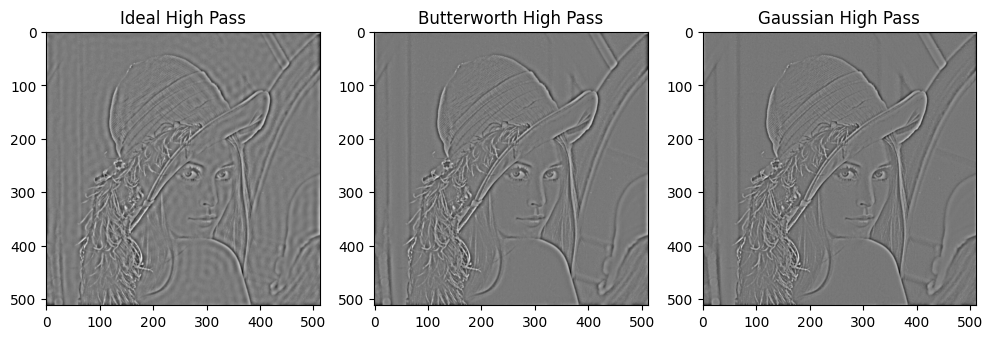

In [11]:
# Set the cutoff frequency
D0 = 30

# Create masks for each filter
ideal_mask = ideal_high_pass_filter(image.shape, D0)
butterworth_mask = butterworth_high_pass_filter(image.shape, D0, n=2)
gaussian_mask = gaussian_high_pass_filter(image.shape, D0)

# Apply the masks to the shifted DFT
ideal_filtered = dft_shift * ideal_mask
butterworth_filtered = dft_shift * butterworth_mask
gaussian_filtered = dft_shift * gaussian_mask

# Shift back and take the inverse Fourier Transform to get the image in spatial domain
ideal_image = np.fft.ifft2(np.fft.ifftshift(ideal_filtered)).real
butterworth_image = np.fft.ifft2(np.fft.ifftshift(butterworth_filtered)).real
gaussian_image = np.fft.ifft2(np.fft.ifftshift(gaussian_filtered)).real

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(ideal_image, cmap='gray'), plt.title("Ideal High Pass")
plt.subplot(132), plt.imshow(butterworth_image, cmap='gray'), plt.title("Butterworth High Pass")
plt.subplot(133), plt.imshow(gaussian_image, cmap='gray'), plt.title("Gaussian High Pass")
plt.show()


<ipython-input-9-92b6380b9ac1>:6: RuntimeWarning: divide by zero encountered in scalar divide
  mask[u, v] = 1 / (1 + (D0 / D) ** (2 * n))


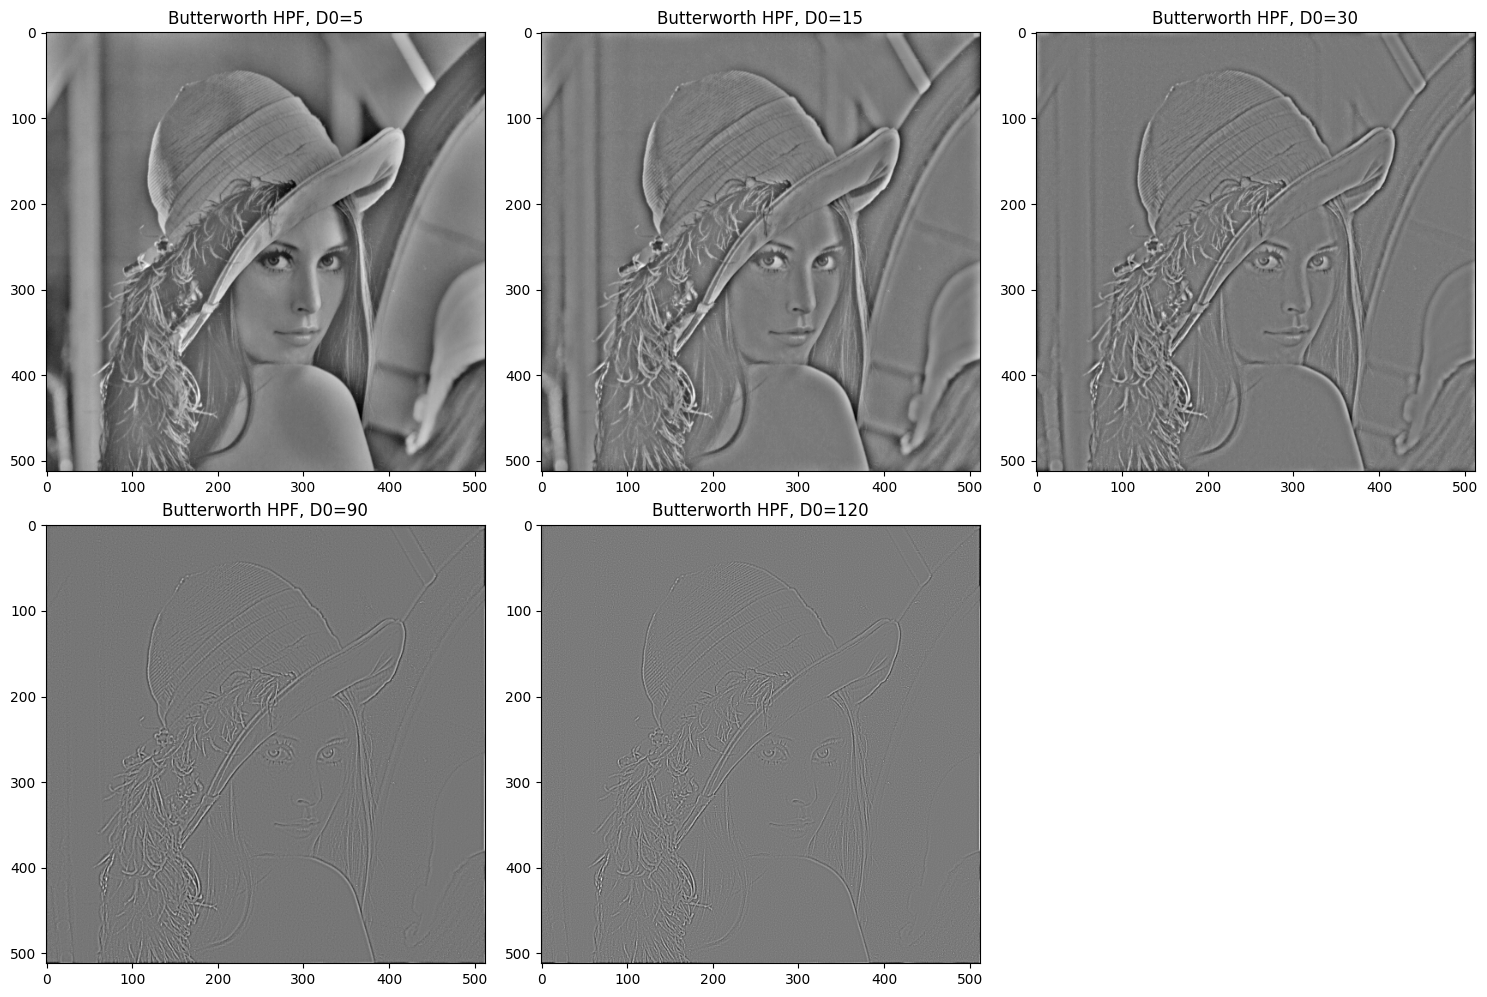

In [12]:
cutoff_values = [5, 15, 30, 90, 120]
plt.figure(figsize=(15, 10))

for i, D0 in enumerate(cutoff_values, 1):
    butterworth_mask = butterworth_high_pass_filter(image.shape, D0, n=2)
    butterworth_filtered = dft_shift * butterworth_mask
    butterworth_image = np.fft.ifft2(np.fft.ifftshift(butterworth_filtered)).real

    plt.subplot(2, 3, i)
    plt.imshow(butterworth_image, cmap='gray')
    plt.title(f"Butterworth HPF, D0={D0}")

plt.tight_layout()
plt.show()


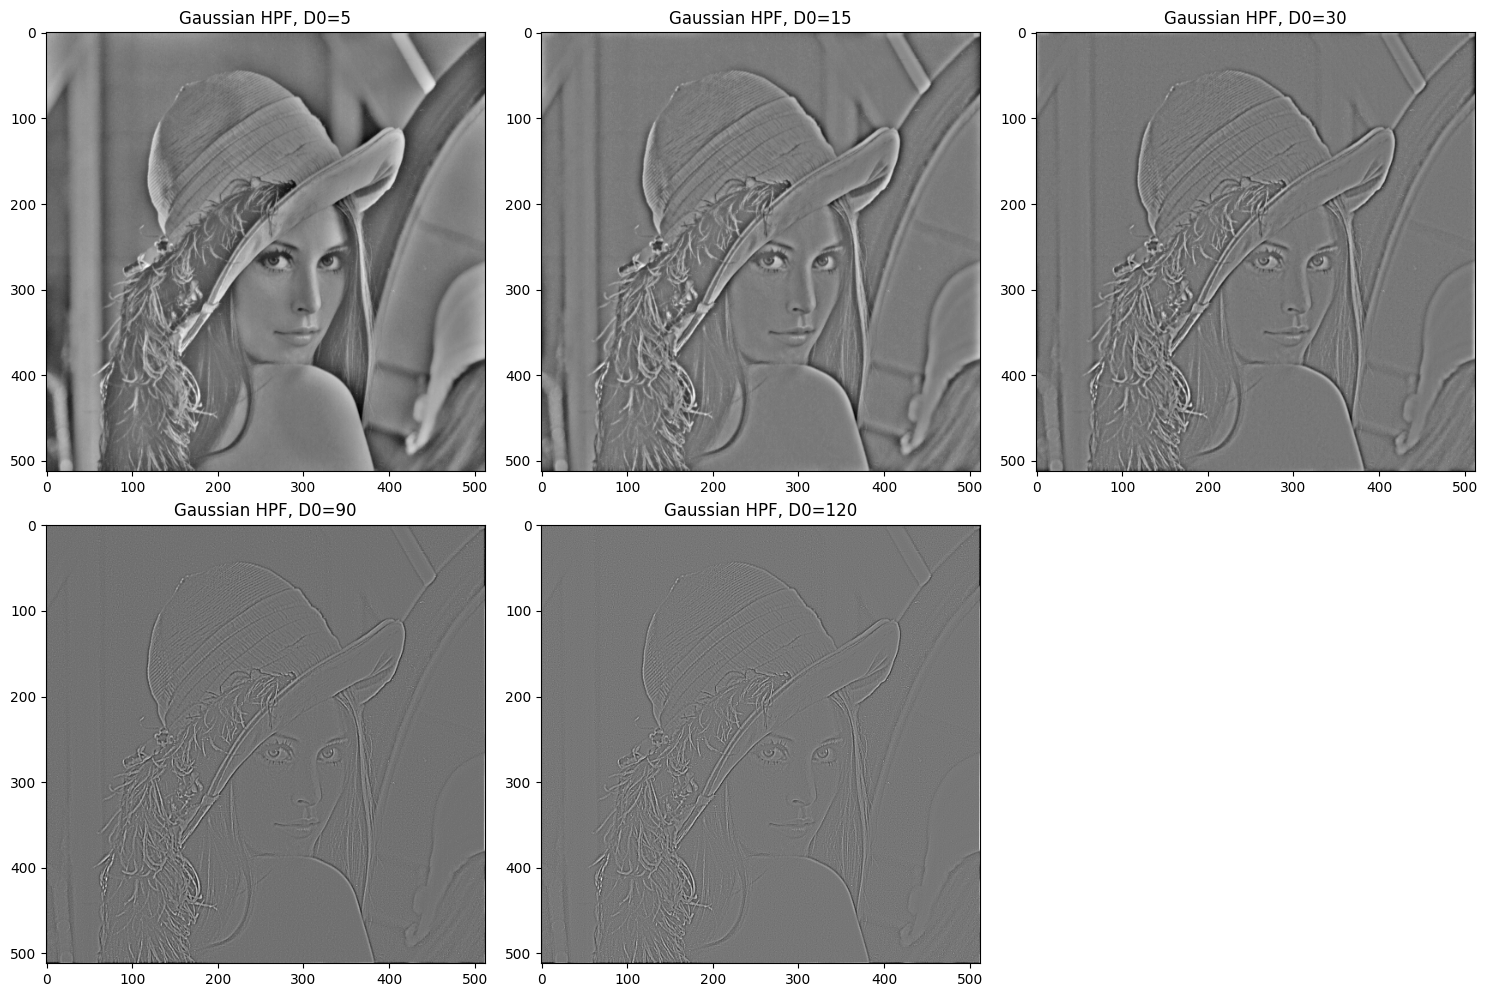

In [13]:
plt.figure(figsize=(15, 10))

for i, D0 in enumerate(cutoff_values, 1):
    gaussian_mask = gaussian_high_pass_filter(image.shape, D0)
    gaussian_filtered = dft_shift * gaussian_mask
    gaussian_image = np.fft.ifft2(np.fft.ifftshift(gaussian_filtered)).real

    plt.subplot(2, 3, i)
    plt.imshow(gaussian_image, cmap='gray')
    plt.title(f"Gaussian HPF, D0={D0}")

plt.tight_layout()
plt.show()
